In [94]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

Load the data set 

In [95]:
cricket_data = pd.read_csv('matches.csv')

In [96]:
cricket_data.head(10)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30
5,6,"March 26,2025","Barsapara Stadium, Guwahati",RR,KKR,League,KKR,Bowl,151.0,9.0,...,completed,KKR,NaN,8,15.0,Quinton de Kock,Quinton de Kock,97.0,Varun Chakravarthy,2--17
6,7,"March 27,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,LSG,League,LSG,Bowl,190.0,9.0,...,completed,LSG,NaN,5,23.0,Shardul Thakur,Nicholas Pooran,70.0,Shardul Thakur,4--34
7,8,"March 28,2025","MA Chidambaram Stadium, Chennai",CSK,RCB,League,CSK,Bowl,196.0,7.0,...,completed,RCB,50,NaN,0.0,Rajat Patidar,Rajat Patidar,51.0,Josh Hazlewood,3--21
8,9,"March 29,2025","Narendra Modi Stadium, Ahmedabad",GT,MI,League,MI,Bowl,196.0,8.0,...,completed,GT,36,NaN,0.0,Prasidh Krishna,Sai Sudarshan,63.0,Prasidh Krishna,2--18
9,10,"March 30,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,SRH,League,SRH,Bat,163.0,10.0,...,completed,DC,NaN,7,24.0,Mitchell Starc,Aniket Verma,74.0,Mitchell Starc,5--35


Check the info about dataset

In [97]:
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

Let,s check the date columns 

In [98]:
type(cricket_data['date'][0])

str

In [99]:
cricket_data['date']

0     March 22,2025
1     March 23,2025
2     March 23,2025
3     March 24,2025
4     March 25,2025
          ...      
69      May 27,2025
70      May 29,2025
71      May 30,2025
72      June 1,2025
73      June 3,2025
Name: date, Length: 74, dtype: object

Now convert into string---->Timestamp 

In [100]:
cricket_data['date']  = cricket_data['date'].str.replace(',', ',',regex=False)

In [101]:
cricket_data['date'][0]

'March 22,2025'

In [102]:
cricket_data['date'] = cricket_data['date'].str.replace(',', ', ', regex=False) 

In [103]:
cricket_data['date'] = pd.to_datetime(cricket_data['date'], format='%B %d, %Y')

In [104]:
type(cricket_data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [105]:
cricket_data['date'].head(5)

0   2025-03-22
1   2025-03-23
2   2025-03-23
3   2025-03-24
4   2025-03-25
Name: date, dtype: datetime64[ns]

Also check the another columns 

In [106]:
cricket_data['balls_left'].value_counts()


balls_left
0.0      26
3.0       4
9.0       4
13.0      3
6.0       3
8.0       3
20.0      2
22.0      2
23.0      2
15.0      2
26.0      2
10.0      2
2.0       2
4.0       2
11.0      2
24.0      1
5.0       1
43.0      1
7.0       1
29.0      1
59.0      1
114.0     1
25.0      1
17.0      1
1.0       1
60.0      1
Name: count, dtype: int64

In [107]:
cricket_data['best_bowling'].value_counts()

best_bowling
Prasidh Krishna       5
Krunal Pandya         4
Arshdeep Singh        4
Josh Hazlewood        3
Varun Chakravarthy    3
Noor Ahmad            3
Jasprit Bumrah        3
Jofra Archer          2
Mitchell Starc        2
Sai Kishore           2
Jaydev Unadkat        2
Will O'Rourke         2
Sunil Narine          2
Mohammed Siraj        2
Yuzvendra Chahal      2
Karn Sharma           2
Harshal Patel         2
Pat Cummins           2
Wanindu Hasranga      1
Shardul Thakur        1
Tushar Deshpande      1
Lockie Ferguson       1
Ashwani Kumar         1
Harshit Rana          1
Khaleel Ahmed         1
Hardik Pandya         1
Avesh Khan            1
Ravi Bishnoi          1
Kuldeep Yadav         1
Trent Boult           1
Bhuvneshwar Kumar     1
Maheesh Theekshana    1
Lungi Ngidi           1
Mukesh Kumar          1
Harpreet Brar         1
Arshad Khan           1
Akash Madhwal         1
Eshan Malinga         1
Mitchell Santner      1
Mustafizur Rahman     1
Suyash Sharma         1
Azm

In [108]:
cricket_data['best_bowling_figure'].value_counts()

best_bowling_figure
2--25    4
3--29    3
3--30    2
3--22    2
3--21    2
2--17    2
2--18    2
2--28    2
4--33    2
3--33    2
3--36    2
4--28    2
2--32    2
3--24    2
3--19    1
4--18    1
3--44    1
3--42    1
4--35    1
4--24    1
4--34    1
5--35    1
2--40    1
2--51    1
4--45    1
4--17    1
3--25    1
5--36    1
3--43    1
4--42    1
1--29    1
3--13    1
4--41    1
3--14    1
3--37    1
4--26    1
4--22    1
2--26    1
2--35    1
4--32    1
3--35    1
3--23    1
3--16    1
2--19    1
4--31    1
1--7     1
3--11    1
3--27    1
3--28    1
2--74    1
3--17    1
2--42    1
2--43    1
3--40    1
Name: count, dtype: int64

Now split this columns into to two columns 
---> best_bowling_wickets 
---> best_bowling_runs 

In [109]:
cricket_data[['best_bowling_wickets1','best_bowling_runs']] = cricket_data['best_bowling_figure'].str.split('--',expand=True)


In [110]:
cricket_data['best_bowling_wickets1']

0     3
1     3
2     4
3     3
4     3
     ..
69    2
70    3
71    2
72    2
73    3
Name: best_bowling_wickets1, Length: 74, dtype: object

In [111]:
split_data = cricket_data['best_bowling_figure'].str.split('-',expand=True)

In [112]:
cricket_data['best_bowling_wickets1'] = pd.to_numeric(split_data[0],errors='coerce')
# cricket_data['best_bowling_runs'] = pd.to_numeric(split_data[1],errors='coerce')



In [113]:
cricket_data['best_bowling_wickets1'] = cricket_data['best_bowling_wickets1'].fillna(cricket_data['best_bowling_wickets1'].median())

In [114]:
cricket_data['best_bowling_wickets1'].value_counts()

best_bowling_wickets1
3.0    34
2.0    20
4.0    16
5.0     2
1.0     2
Name: count, dtype: int64

In [115]:
cricket_data['best_bowling_runs'].value_counts()

best_bowling_runs
25    5
28    5
29    4
17    4
35    4
33    4
36    3
22    3
18    3
24    3
32    3
42    3
19    2
26    2
43    2
30    2
21    2
40    2
45    1
44    1
34    1
51    1
13    1
41    1
14    1
37    1
23    1
16    1
31    1
7     1
11    1
27    1
74    1
Name: count, dtype: int64

In [116]:
cricket_data['best_bowling_figure']

0     3--29
1     3--44
2     4--18
3     3--42
4     3--30
      ...  
69    2--74
70    3--17
71    2--42
72    2--43
73    3--40
Name: best_bowling_figure, Length: 74, dtype: object

Change the columns name 

In [117]:
cricket_data.rename(columns={'first_ings_score':'first_innings_score'} , inplace=True)

In [118]:
cricket_data['first_ings_wkts']

0      8.0
1      6.0
2      9.0
3      8.0
4      5.0
      ... 
69     3.0
70    10.0
71     5.0
72     6.0
73     9.0
Name: first_ings_wkts, Length: 74, dtype: float64

In [119]:
cricket_data.rename(columns={'first_ings_wkts':'first_innings_wickets'} , inplace=True)

In [120]:
cricket_data['balls_left'].value_counts()

balls_left
0.0      26
3.0       4
9.0       4
13.0      3
6.0       3
8.0       3
20.0      2
22.0      2
23.0      2
15.0      2
26.0      2
10.0      2
2.0       2
4.0       2
11.0      2
24.0      1
5.0       1
43.0      1
7.0       1
29.0      1
59.0      1
114.0     1
25.0      1
17.0      1
1.0       1
60.0      1
Name: count, dtype: int64

In [121]:
type(cricket_data['highscore'][0])

numpy.float64

In [122]:
cricket_data['player_of_the_match'].value_counts()

player_of_the_match
Krunal Pandya          3
Shreyas Iyer           3
Ishan Kishan           2
Noor Ahmad             2
Prasidh Krishna        2
KL Rahul               2
Rajat Patidar          2
Prabhsimran Singh      2
Mitchell Starc         2
Mohammed Siraj         2
Sai Sudarshan          2
Abhishek Sharma        2
Sunil Narine           2
Shubman Gill           2
Will Jacks             2
Rohit Sharma           2
Shardul Thakur         1
Ashwani Kumar          1
Nitish Rana            1
Ashutosh Sharma        1
Quinton de Kock        1
Priyansh Arya          1
Nicholas Pooran        1
Jofra Archer           1
Digvesh Singh          1
Vaibhav Arora          1
Karn Sharma            1
Phil Salt              1
Aiden Markram          1
Yuzvendra Chahal       1
MS Dhoni               1
Tim David              1
Jos Buttler            1
Virat Kohli            1
Avesh Khan             1
Mukesh Kumar           1
Trent Boult            1
Josh Hazlewood         1
Harshal Patel          1
Vaibh

In [123]:
cricket_data['second_ings_score']

0     177.0
1     242.0
2     158.0
3     211.0
4     232.0
      ...  
69    230.0
70    106.0
71    208.0
72    207.0
73    184.0
Name: second_ings_score, Length: 74, dtype: float64

In [124]:
cricket_data.rename(columns={'second_ings_score':'second_innings_score'} , inplace=True)

In [125]:
cricket_data['second_ings_wkts']

0     3.0
1     6.0
2     6.0
3     9.0
4     5.0
     ... 
69    4.0
70    2.0
71    6.0
72    5.0
73    7.0
Name: second_ings_wkts, Length: 74, dtype: float64

In [126]:
cricket_data.rename(columns={'second_ings_wkts': 'second_innings_wickets'},inplace=True)

In [127]:
cricket_data['stage'].value_counts()

stage
League      70
Playoffs     3
Final        1
Name: count, dtype: int64

In [128]:
cricket_data['team1']

0      KKR
1      SRH
2      CSK
3       DC
4       GT
      ... 
69     LSG
70    PBKS
71      GT
72    PBKS
73     RCB
Name: team1, Length: 74, dtype: object

In [129]:
cricket_data['team2']

0      RCB
1       RR
2       MI
3      LSG
4     PBKS
      ... 
69     RCB
70     RCB
71      MI
72      MI
73    PBKS
Name: team2, Length: 74, dtype: object

In [130]:
cricket_data['top_scorer'].value_counts()

top_scorer
Virat Kohli             4
Nicholas Pooran         4
Ishan Kishan            3
Sai Sudarshan           3
Ryan Rickelton          3
Shubman Gill            3
KL Rahul                3
Yashasvi Jaiswal        3
Shreyas Iyer            2
Rishabh Pant            2
Abhishek Sharma         2
Heinrich Klassen        2
Mitchell Marsh          2
Jos Buttler             2
Prabhsimran Singh       2
Suryakumar Yadav        2
Nitish Rana             2
Dewald Brevis           2
Vaibhav Suryavanshi     2
Rohit Sharma            2
Rachin Ravindra         1
Aniket Verma            1
Rajat Patidar           1
Quinton de Kock         1
Venkatesh Iyer          1
Tim David               1
Angkrish Raghuvanshi    1
Karun Nair              1
Sunil Narine            1
Priyansh Arya           1
Sam Curran              1
Faf du Plessis          1
Krunal Pandya           1
Riyan Parag             1
Ayush Mhatre            1
Will Jacks              1
Nehal Wadhera           1
Sameer Rizvi            1
J

In [131]:
cricket_data['toss_decision'].value_counts()

toss_decision
Bowl    61
Bat     13
Name: count, dtype: int64

In [132]:
cricket_data['toss_winner'].value_counts()

toss_winner
PBKS    12
DC       8
SRH      8
RCB      7
RR       7
GT       7
MI       7
CSK      6
KKR      6
LSG      5
Name: count, dtype: int64

In [133]:
cricket_data['venue'].value_counts()

venue
Narendra Modi Stadium, Ahmedabad                 9
Ekana Cricket Stadium, Lucknow                   8
Eden Gardens, Kolkata                            7
Wankhede Stadium, Mumbai                         7
Arun Jaitley Stadium, Delhi                      7
Sawai Mansingh Stadium, Jaipur                   7
New PCA Cricket Stadium, Mullanpur               6
Rajiv Gandhi International Stadium, Hyderabad    6
MA Chidambaram Stadium, Chennai                  6
M. Chinnaswamy Stadium, Bangalore                6
ACA-VDCA Cricket Stadium, Vishakhapatnam         2
Barsapara Stadium, Guwahati                      2
HPCA Stadium, Dharamshala                        1
Name: count, dtype: int64

In [134]:
cricket_data['wb_runs']

0     NaN
1      44
2     NaN
3     NaN
4      11
     ... 
69    NaN
70    NaN
71     20
72    NaN
73      6
Name: wb_runs, Length: 74, dtype: object

In [135]:
cricket_data.rename(columns={'wb_runs':'wide ball runs'},inplace=True)

In [136]:
cricket_data.rename(columns={'wb_wickets': 'wide wickets'},inplace=True)

In [137]:
cricket_data['wide wickets'] = pd.to_numeric(cricket_data['wide wickets'],errors='coerce')

Now fill the missing values with median 

In [138]:
cricket_data['wide wickets'] = cricket_data['wide wickets'].fillna(cricket_data['wide wickets'].median())

In [139]:
cricket_data['wide wickets']

0     7.0
1     7.0
2     4.0
3     1.0
4     7.0
     ... 
69    6.0
70    8.0
71    7.0
72    5.0
73    7.0
Name: wide wickets, Length: 74, dtype: float64

In [140]:
cricket_data['wide ball runs'] = pd.to_numeric(cricket_data['wide ball runs'],errors='coerce')

In [141]:
cricket_data['wide ball runs']

0      NaN
1     44.0
2      NaN
3      NaN
4     11.0
      ... 
69     NaN
70     NaN
71    20.0
72     NaN
73     6.0
Name: wide ball runs, Length: 74, dtype: float64

missing values is present so again fill with the median

In [142]:
cricket_data['wide ball runs'] = cricket_data['wide ball runs'].fillna(cricket_data['wide ball runs'].median())

In [143]:
cricket_data['wide ball runs']

0     25.0
1     44.0
2     25.0
3     25.0
4     11.0
      ... 
69    25.0
70    25.0
71    20.0
72    25.0
73     6.0
Name: wide ball runs, Length: 74, dtype: float64

In [144]:
cricket_data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_innings_score,first_innings_wickets,...,wide ball runs,wide wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,best_bowling_wickets1,best_bowling_runs
0,1,2025-03-22,"Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,25.0,7.0,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,3.0,29
1,2,2025-03-23,"Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,44.0,7.0,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,3.0,44
2,3,2025-03-23,"MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,25.0,4.0,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18,4.0,18
3,4,2025-03-24,"ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,25.0,1.0,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42,3.0,42
4,5,2025-03-25,"Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,11.0,7.0,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,3.0,30


# Data visulization 

#  1. Which venues host the most matches ?


In [145]:
venues  =  cricket_data['venue'].value_counts().reset_index().head(3)

In [146]:
venues

,venue,count
0,"Narendra Modi Stadium, Ahmedabad",9
1,"Ekana Cricket Stadium, Lucknow",8
2,"Eden Gardens, Kolkata",7


C:\Users\ragha\AppData\Local\Temp\ipykernel_13556\2906938684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = venues, x = 'venue', y = 'count',palette='rainbow')


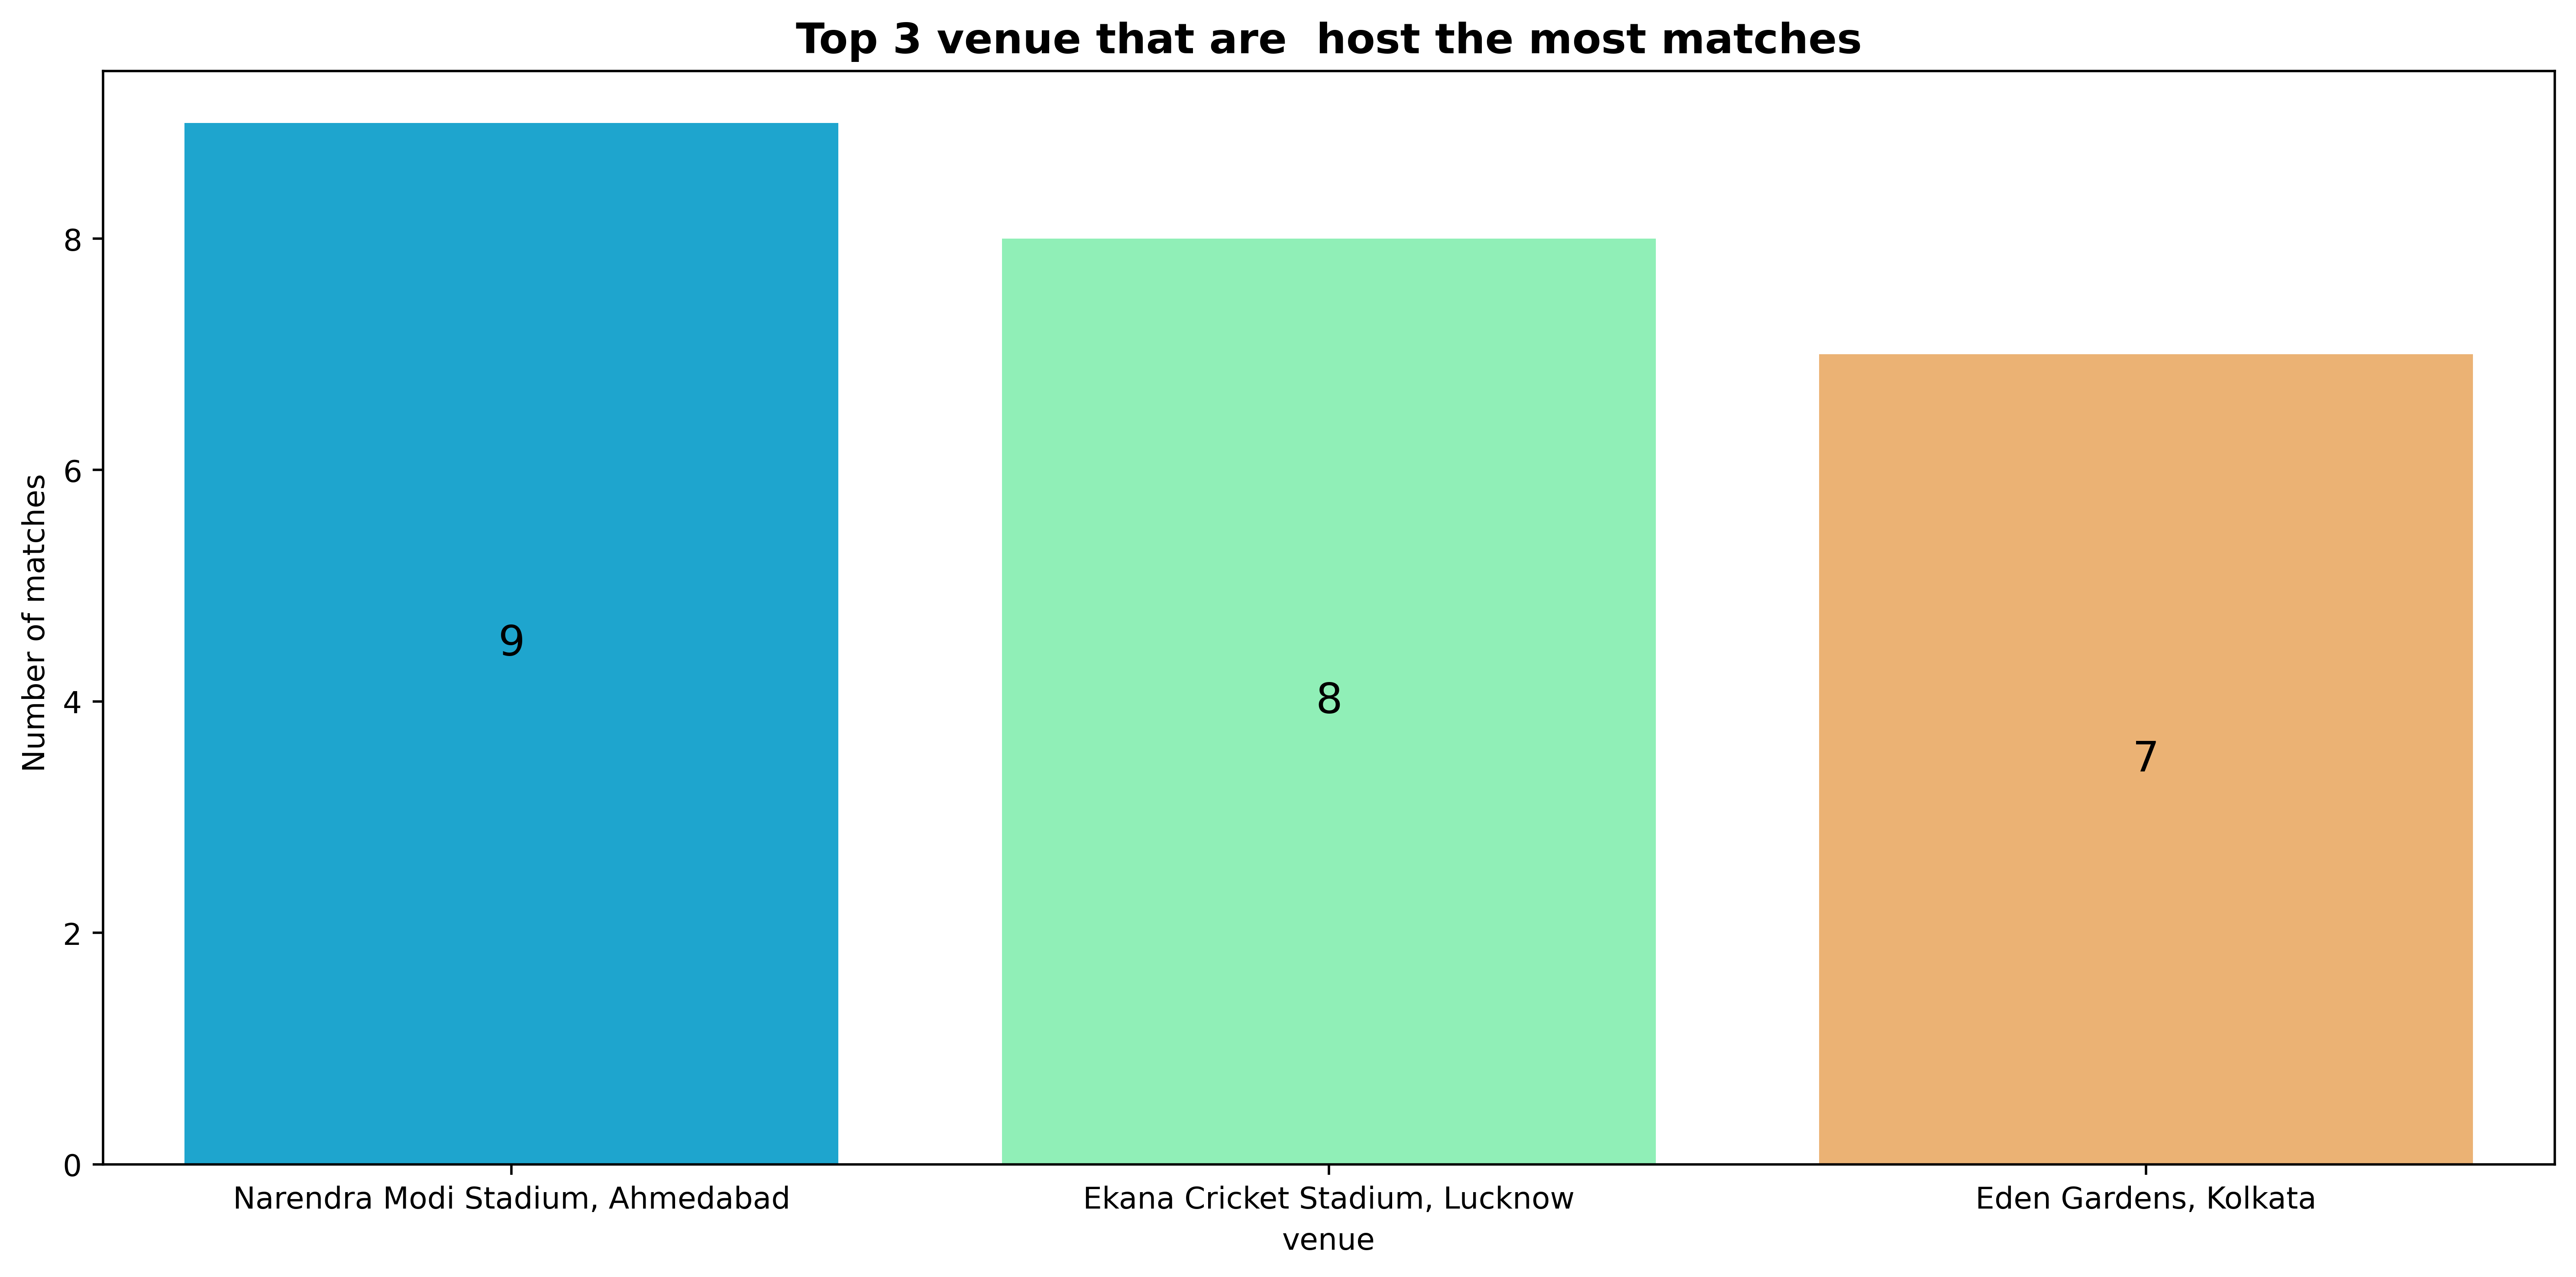

In [229]:
plt.figure(figsize=(12,6), dpi = 500)
ax = sns.barplot(data = venues, x = 'venue', y = 'count',palette='rainbow')
for i in ax.containers:
    ax.bar_label(i , label_type='center',fontsize =14 )
plt.title("Top 3 venue that are  host the most matches",fontsize = 14 , fontweight = 'bold')
plt.ylabel("Number of matches ")
plt.tight_layout()
plt.show()

# 2. Which team win the toss most often , and what decision do they make (bat/field)?

In [148]:
team1_toss_most =cricket_data.groupby('team1')['toss_decision'].value_counts()

In [149]:
toss =team1_toss_most.sort_values(ascending=False).head(3)

In [150]:
df = pd.DataFrame(toss)
df

,,count
team1,toss_decision,
RCB,Bowl,8
MI,Bowl,7
LSG,Bowl,7


C:\Users\ragha\AppData\Local\Temp\ipykernel_13556\130712615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df , x = 'team1', y = 'count',palette='Set1')


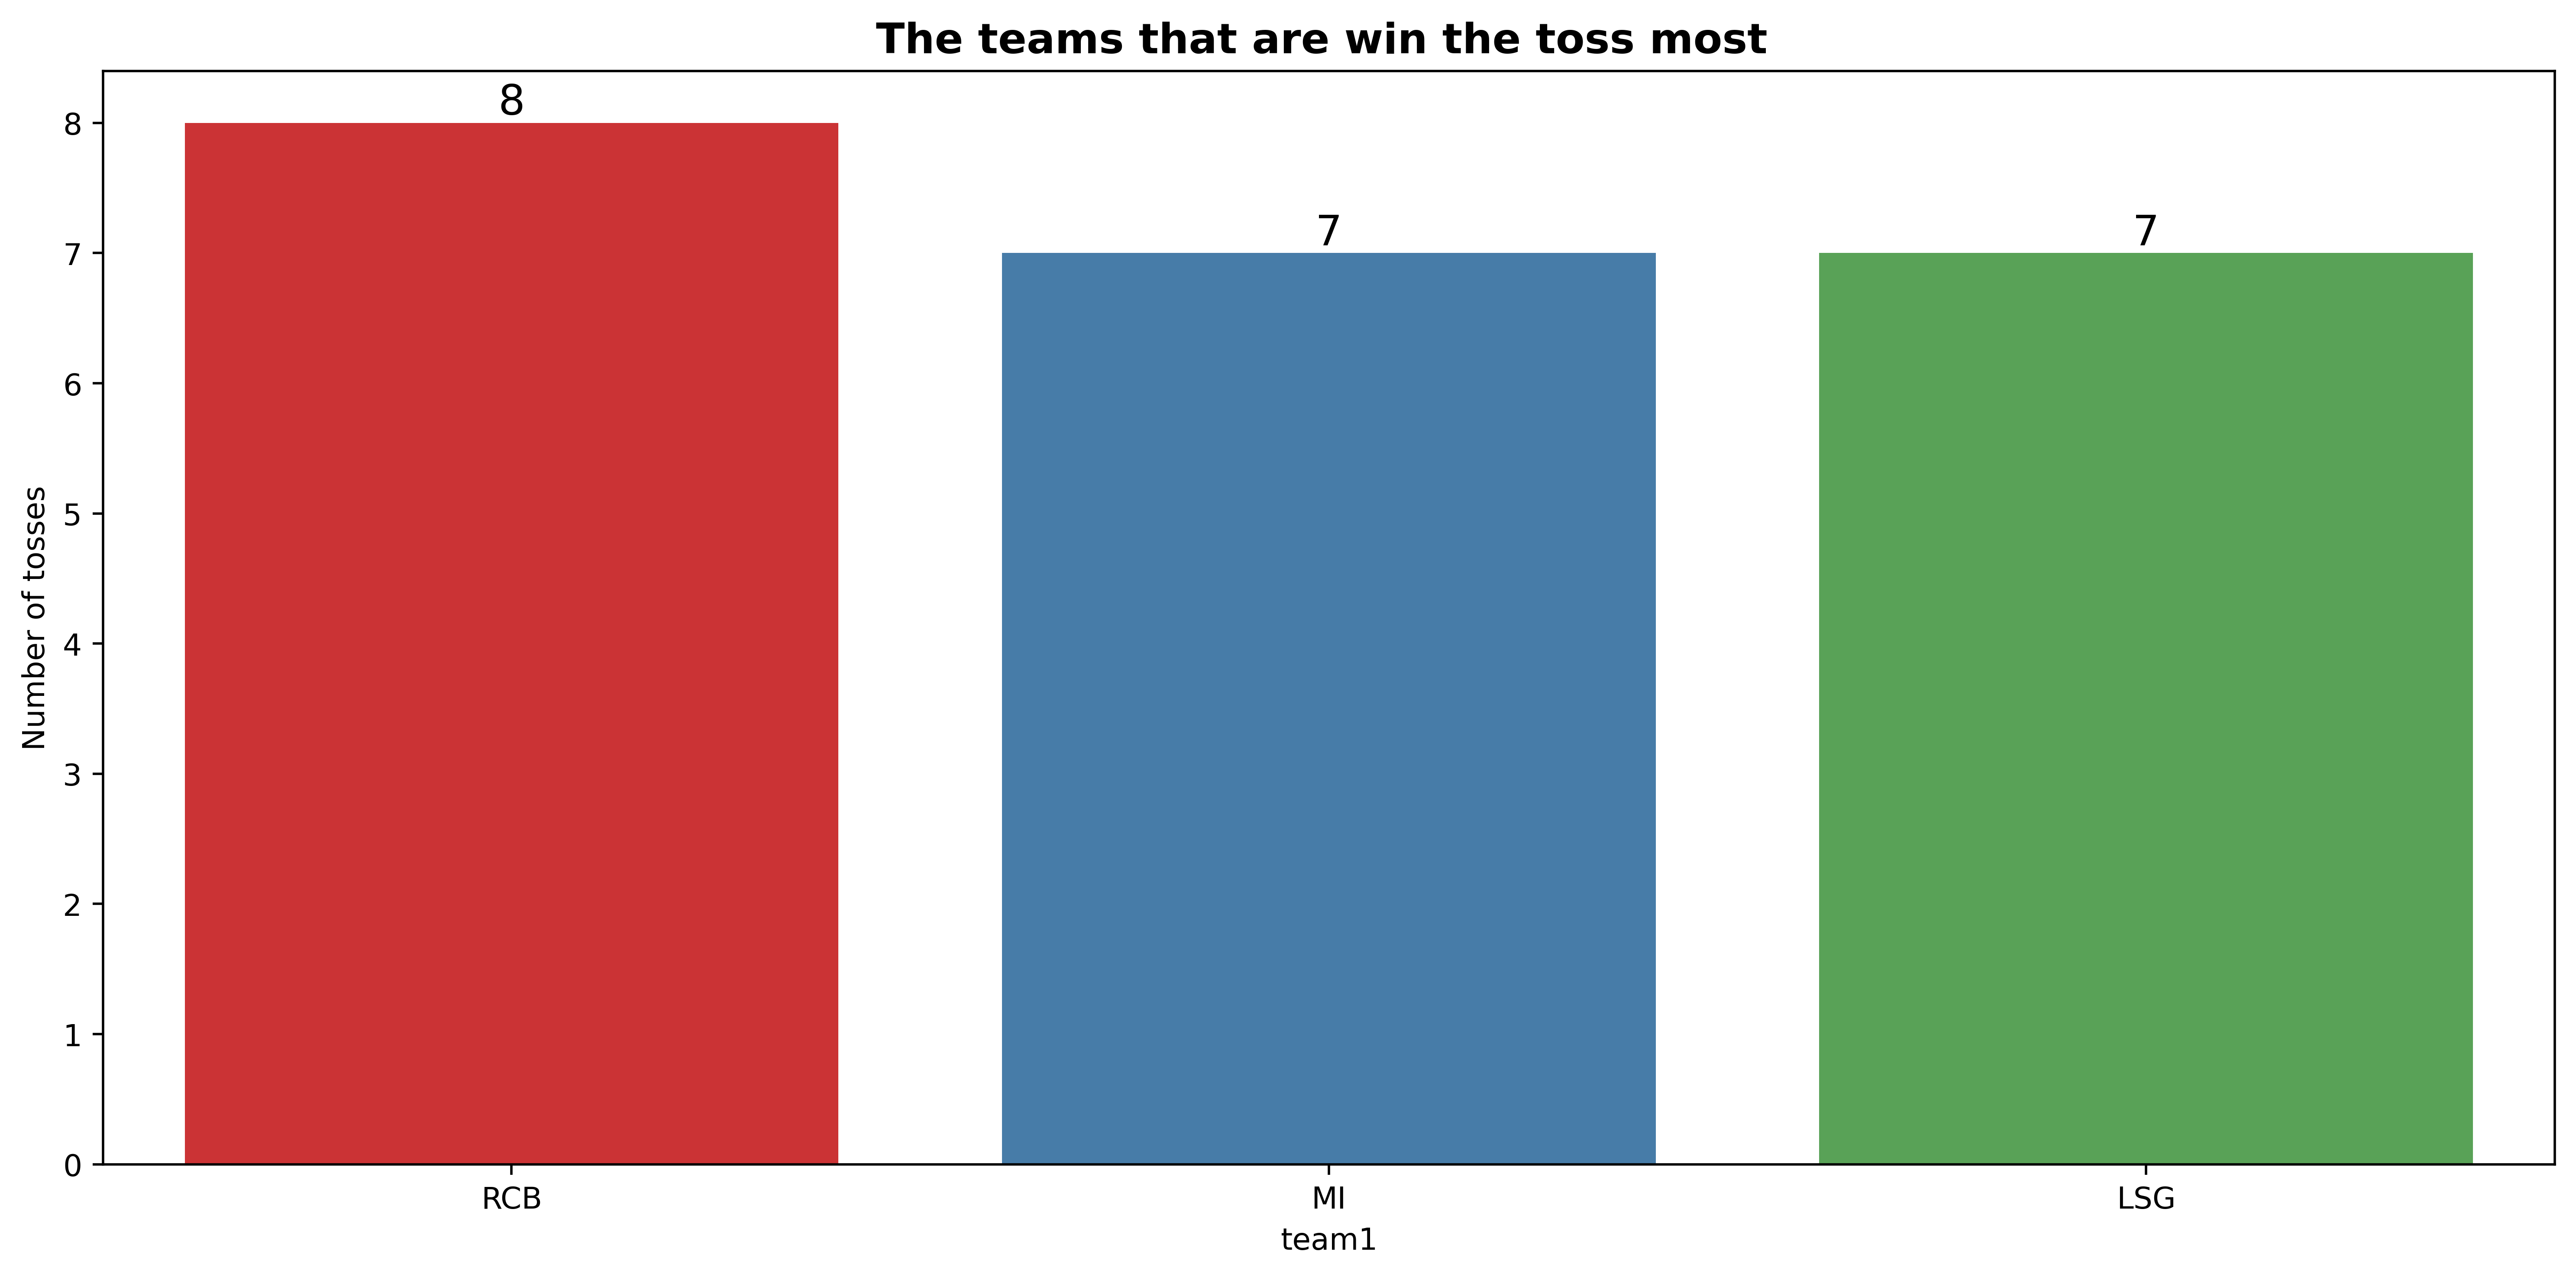

In [230]:
plt.figure(figsize=(12,6),dpi = 500)
ax = sns.barplot(data = df , x = 'team1', y = 'count',palette='Set1')
for i in ax.containers:
    ax.bar_label(i,label_type='edge',fontsize = 14)
plt.title("The teams that are win the toss most " , fontsize= 14 , fontweight = 'bold')
plt.ylabel("Number of tosses")
plt.tight_layout()
plt.show()

# 3. Which teams have the highest match win percentage ? 

In [152]:
team_played = pd.concat([cricket_data['team1'],cricket_data['team2']])

In [153]:
total_matches_played = team_played.value_counts()

In [154]:
total_matches_played

PBKS    17
MI      16
RCB     16
GT      15
SRH     14
KKR     14
RR      14
DC      14
CSK     14
LSG     14
Name: count, dtype: int64

In [155]:
match_won = cricket_data['match_winner'].value_counts()

In [156]:
match_won

match_winner
PBKS    11
RCB     10
GT       9
MI       8
DC       8
SRH      6
LSG      6
KKR      5
CSK      4
RR       4
Name: count, dtype: int64

In [157]:
win_data = pd.DataFrame({
    'Total Matches':total_matches_played,
    'Matches Won':match_won
})

In [158]:
win_data['Win Percentage'] = (win_data['Matches Won'] / win_data['Total Matches']) * 100
win_data = win_data.sort_values(by='Win Percentage', ascending = False)

In [159]:
win_data

,Total Matches,Matches Won,Win Percentage
PBKS,17,11,64.705882
RCB,16,10,62.500000
GT,15,9,60.000000
DC,14,8,57.142857
MI,16,8,50.000000
SRH,14,6,42.857143
LSG,14,6,42.857143
KKR,14,5,35.714286
CSK,14,4,28.571429
RR,14,4,28.571429


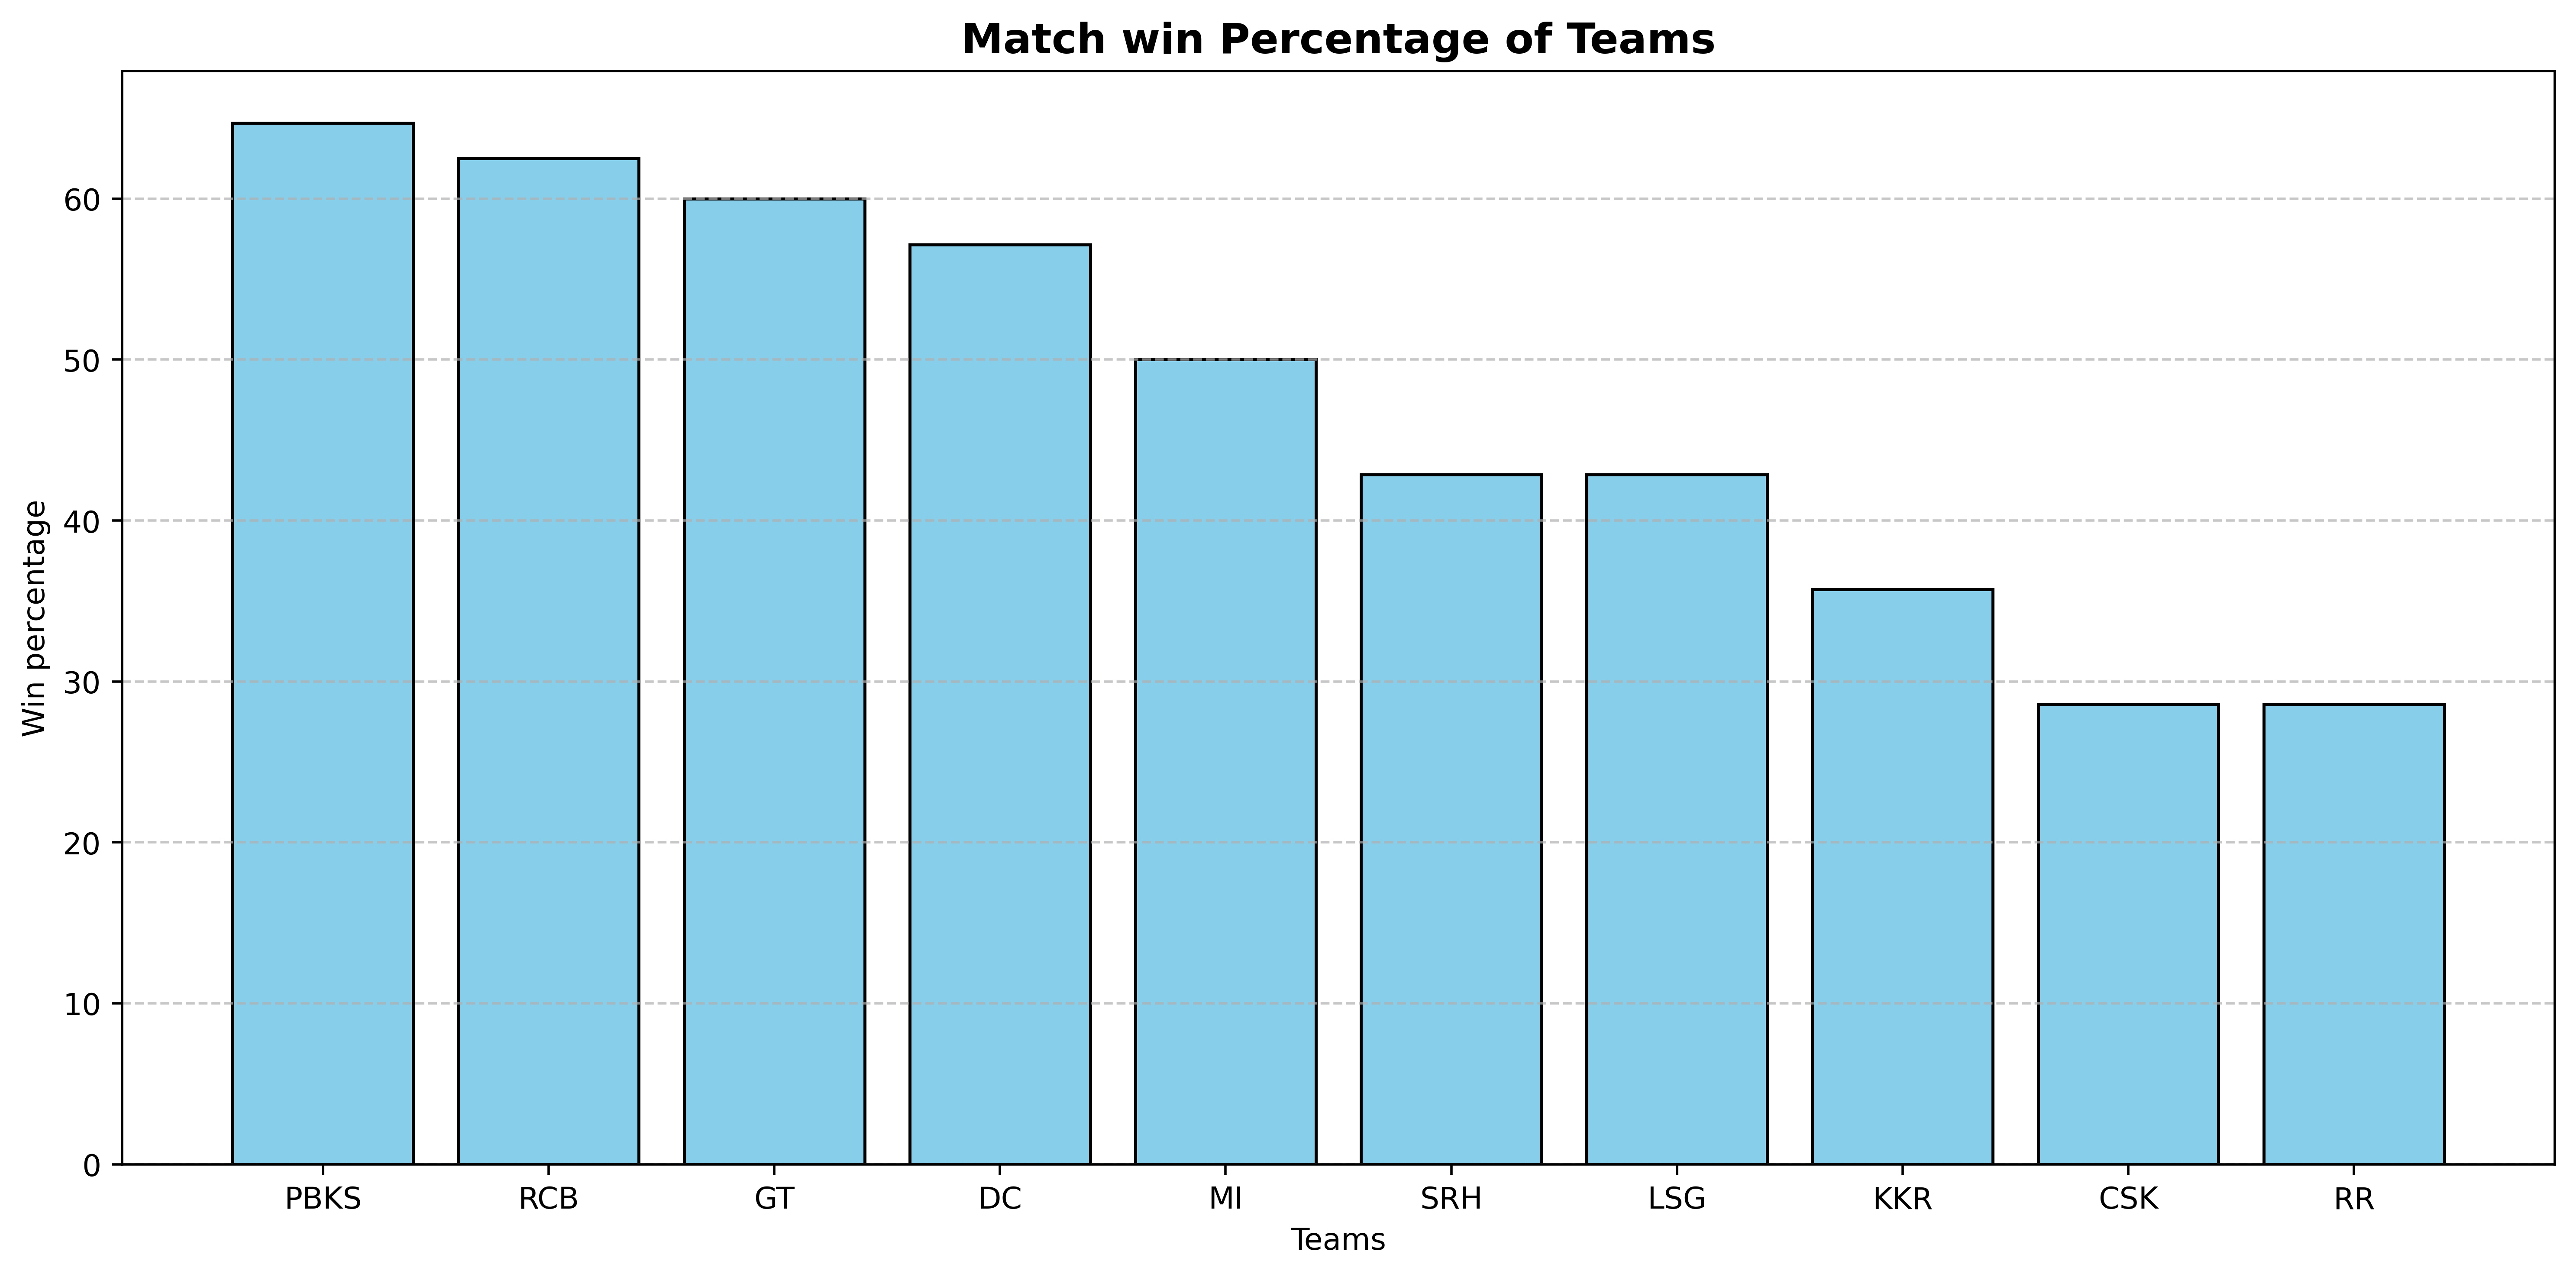

In [160]:
plt.figure(figsize=(12,6),dpi = 500)
plt.bar(win_data.index , win_data['Win Percentage'],color = 'skyblue',edgecolor = 'black')
plt.title("Match win Percentage of Teams",fontsize = 14 , fontweight = 'bold')
plt.xlabel("Teams")
plt.ylabel("Win percentage")
plt.grid(axis = 'y' , linestyle = '--',alpha = 0.7)
plt.tight_layout()
plt.show()

# 4. What,s the average score in first and second innigs across all matches ? 

Drop missing score 

In [161]:
cricket_data_1 = cricket_data[['first_innings_score','second_innings_score']].dropna()

In [162]:
cricket_data_1 

,first_innings_score,second_innings_score
0,174.0,177.0
1,286.0,242.0
2,155.0,158.0
3,209.0,211.0
4,243.0,232.0
...,...,...
69,227.0,230.0
70,101.0,106.0
71,228.0,208.0
72,203.0,207.0


In [166]:
avg_first_innings = cricket_data_1['first_innings_score'].mean()
avg_second_innings = cricket_data_1['second_innings_score'].mean()

In [169]:
avg_first_innings.round(2)

np.float64(190.54)

In [171]:
avg_second_innings.round(2)

np.float64(174.01)

In [173]:
cricket_data_1_melted = cricket_data_1.melt(var_name='Innings',value_name='Score')

In [174]:
cricket_data_1_melted

,Innings,Score
0,first_innings_score,174.0
1,first_innings_score,286.0
2,first_innings_score,155.0
3,first_innings_score,209.0
4,first_innings_score,243.0
...,...,...
139,second_innings_score,230.0
140,second_innings_score,106.0
141,second_innings_score,208.0
142,second_innings_score,207.0


C:\Users\ragha\AppData\Local\Temp\ipykernel_13556\3417727502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Innings' , y = 'Score' , data = cricket_data_1_melted , palette='pastel')


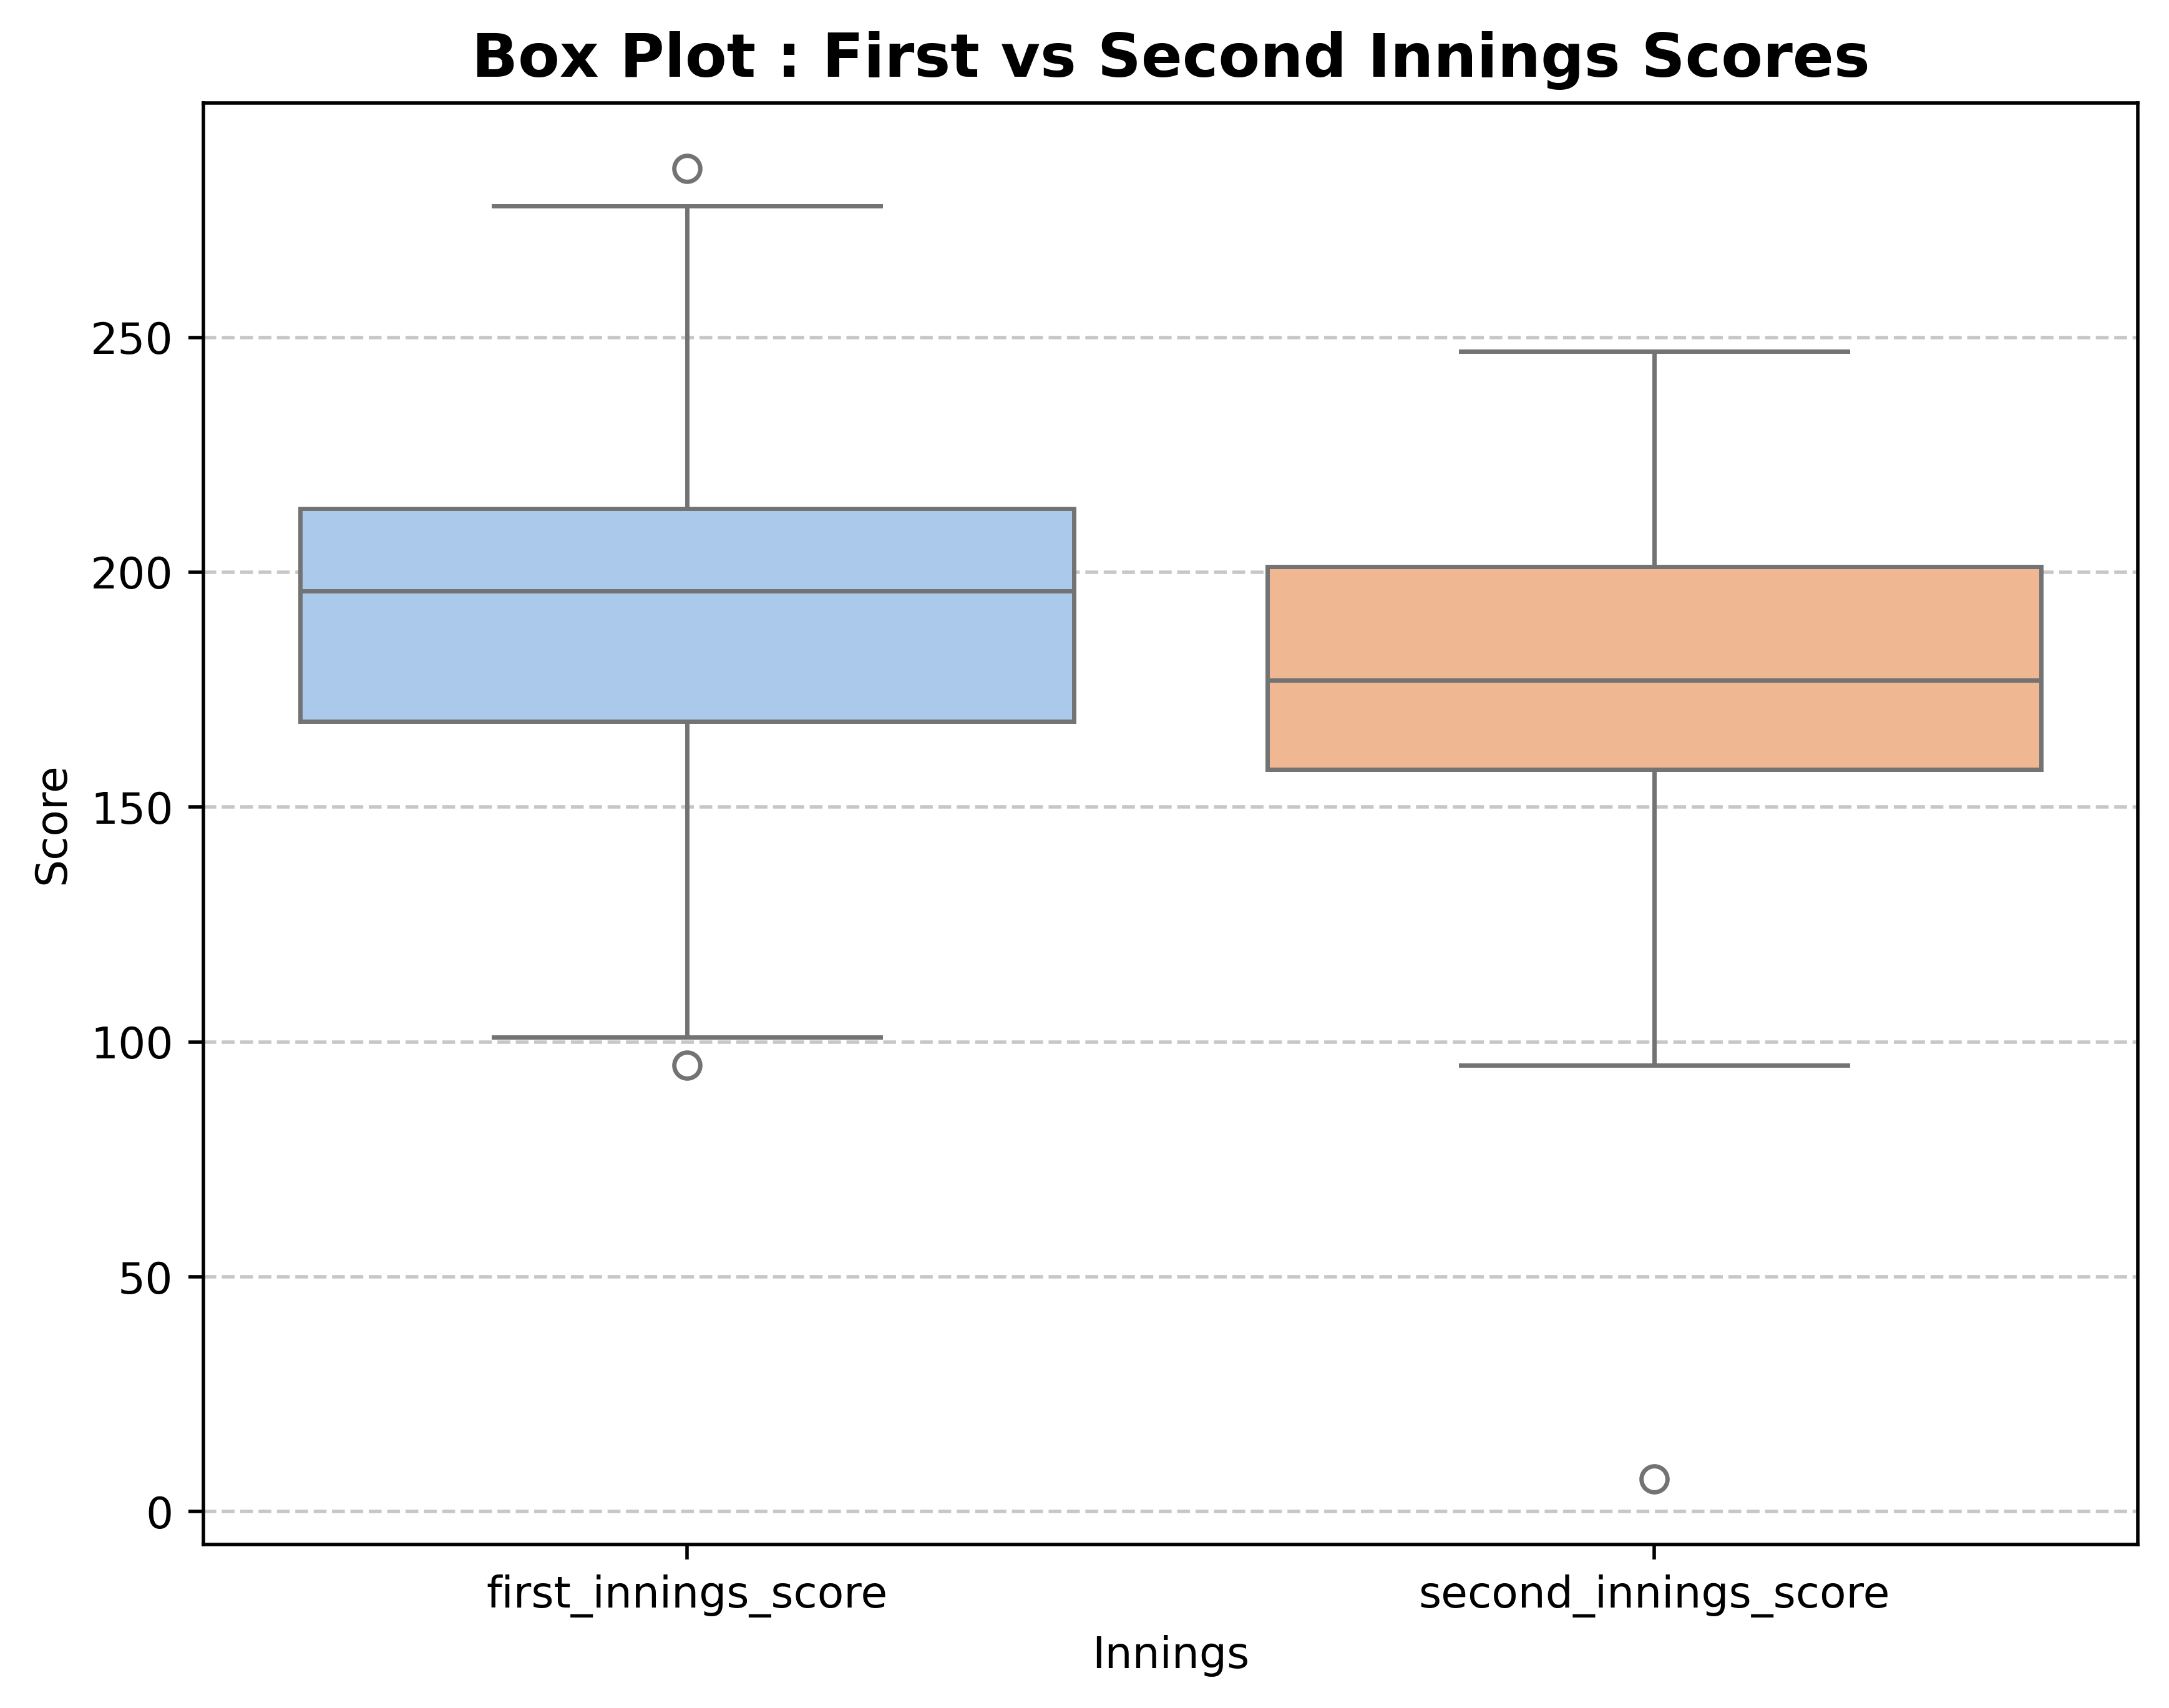

In [183]:
plt.figure(figsize=(8,6),dpi = 500)
sns.boxplot(x = 'Innings' , y = 'Score' , data = cricket_data_1_melted , palette='pastel')
plt.title("Box Plot : First vs Second Innings Scores",fontsize = 14 , fontweight = 'bold')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)
plt.show()


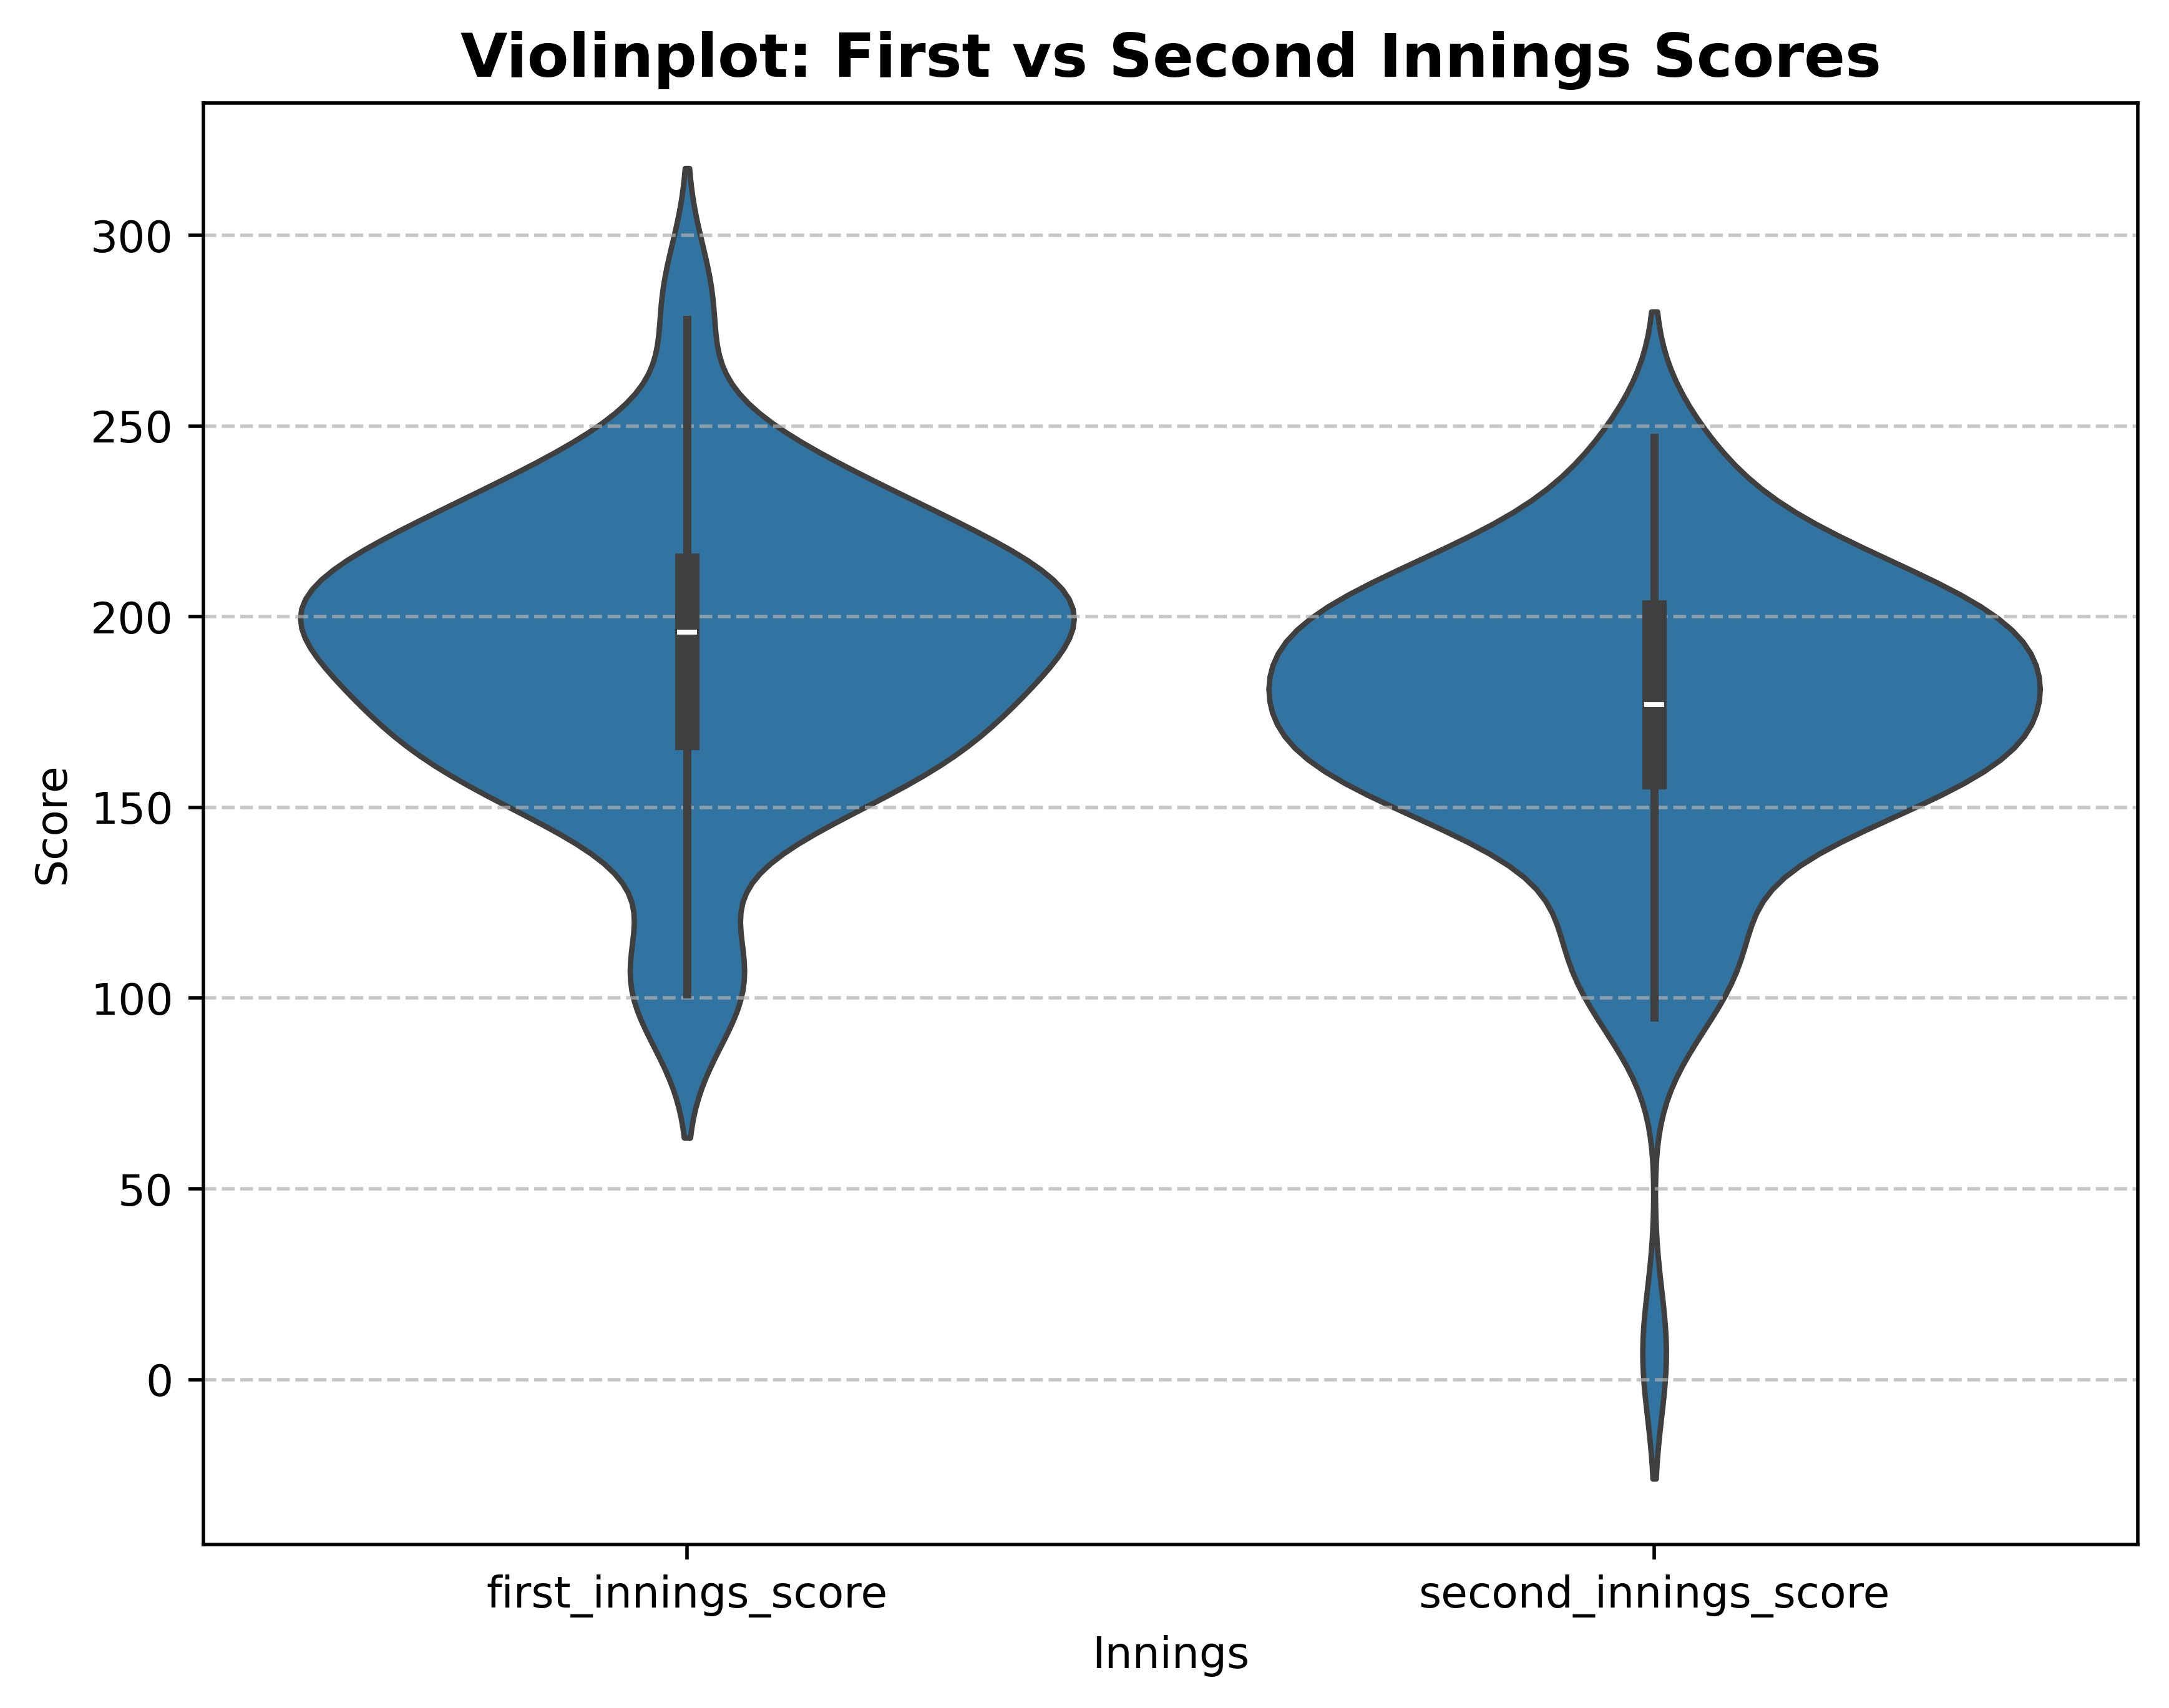

In [186]:
plt.figure(figsize=(8,6),dpi = 500)
sns.violinplot(x = 'Innings' , y = 'Score' , data = cricket_data_1_melted)
plt.title("Violinplot: First vs Second Innings Scores",fontsize = 14 , fontweight = 'bold')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)
plt.show()

# 5. How are the scorers most frequently named 'Top Scorer' or 'Player of the match' ? 

In [198]:
Pom_counts =cricket_data['player_of_the_match'].value_counts().head(10)

In [204]:
Top_scorer_counts = cricket_data['top_scorer'].value_counts().head(10)
Top_scorer_counts

top_scorer
Virat Kohli         4
Nicholas Pooran     4
Ishan Kishan        3
Sai Sudarshan       3
Ryan Rickelton      3
Shubman Gill        3
KL Rahul            3
Yashasvi Jaiswal    3
Shreyas Iyer        2
Rishabh Pant        2
Name: count, dtype: int64

C:\Users\ragha\AppData\Local\Temp\ipykernel_13556\1329649412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Top_scorer_counts.index,y= Top_scorer_counts.values,palette='Blues_d')


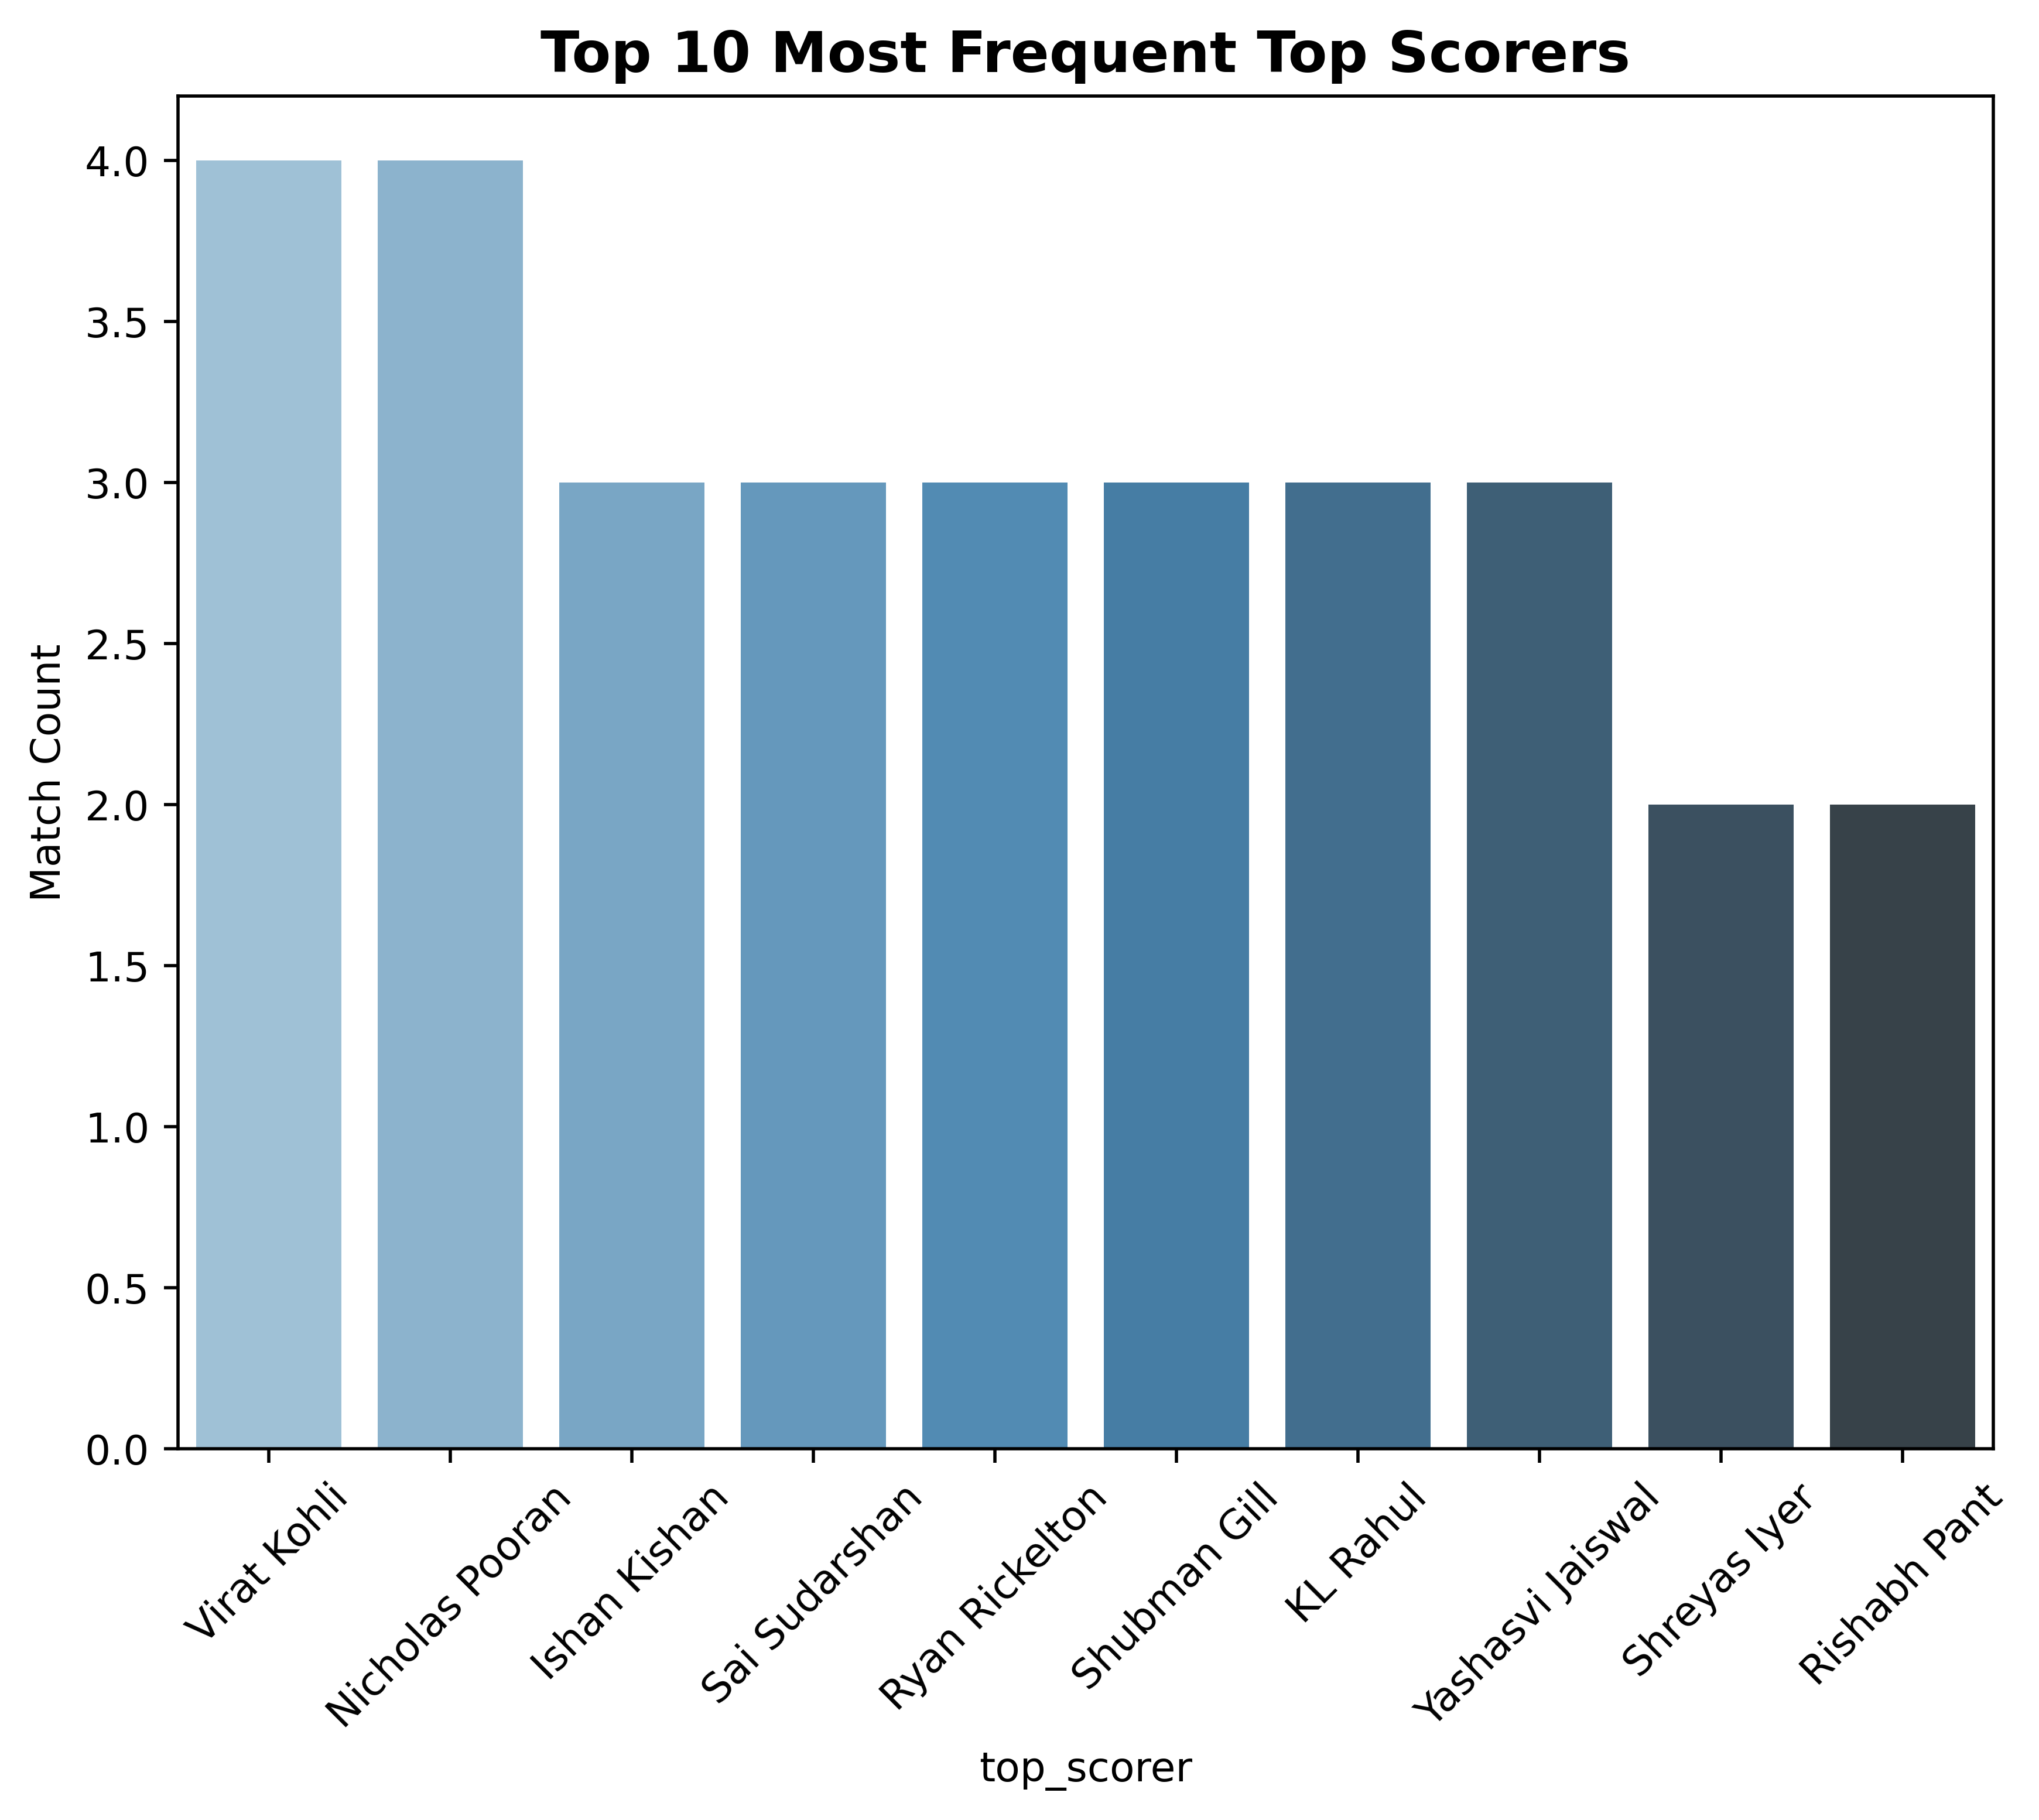

In [207]:
plt.figure(figsize=(8,6), dpi = 500)
sns.barplot(x = Top_scorer_counts.index,y= Top_scorer_counts.values,palette='Blues_d')
plt.xticks(rotation = 45)
plt.title("Top 10 Most Frequent Top Scorers",fontsize = 14 , fontweight = 'bold')
plt.ylabel("Match Count")
plt.show()

C:\Users\ragha\AppData\Local\Temp\ipykernel_13556\3749752417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Pom_counts.index,y= Pom_counts.values,palette='Greens_d')


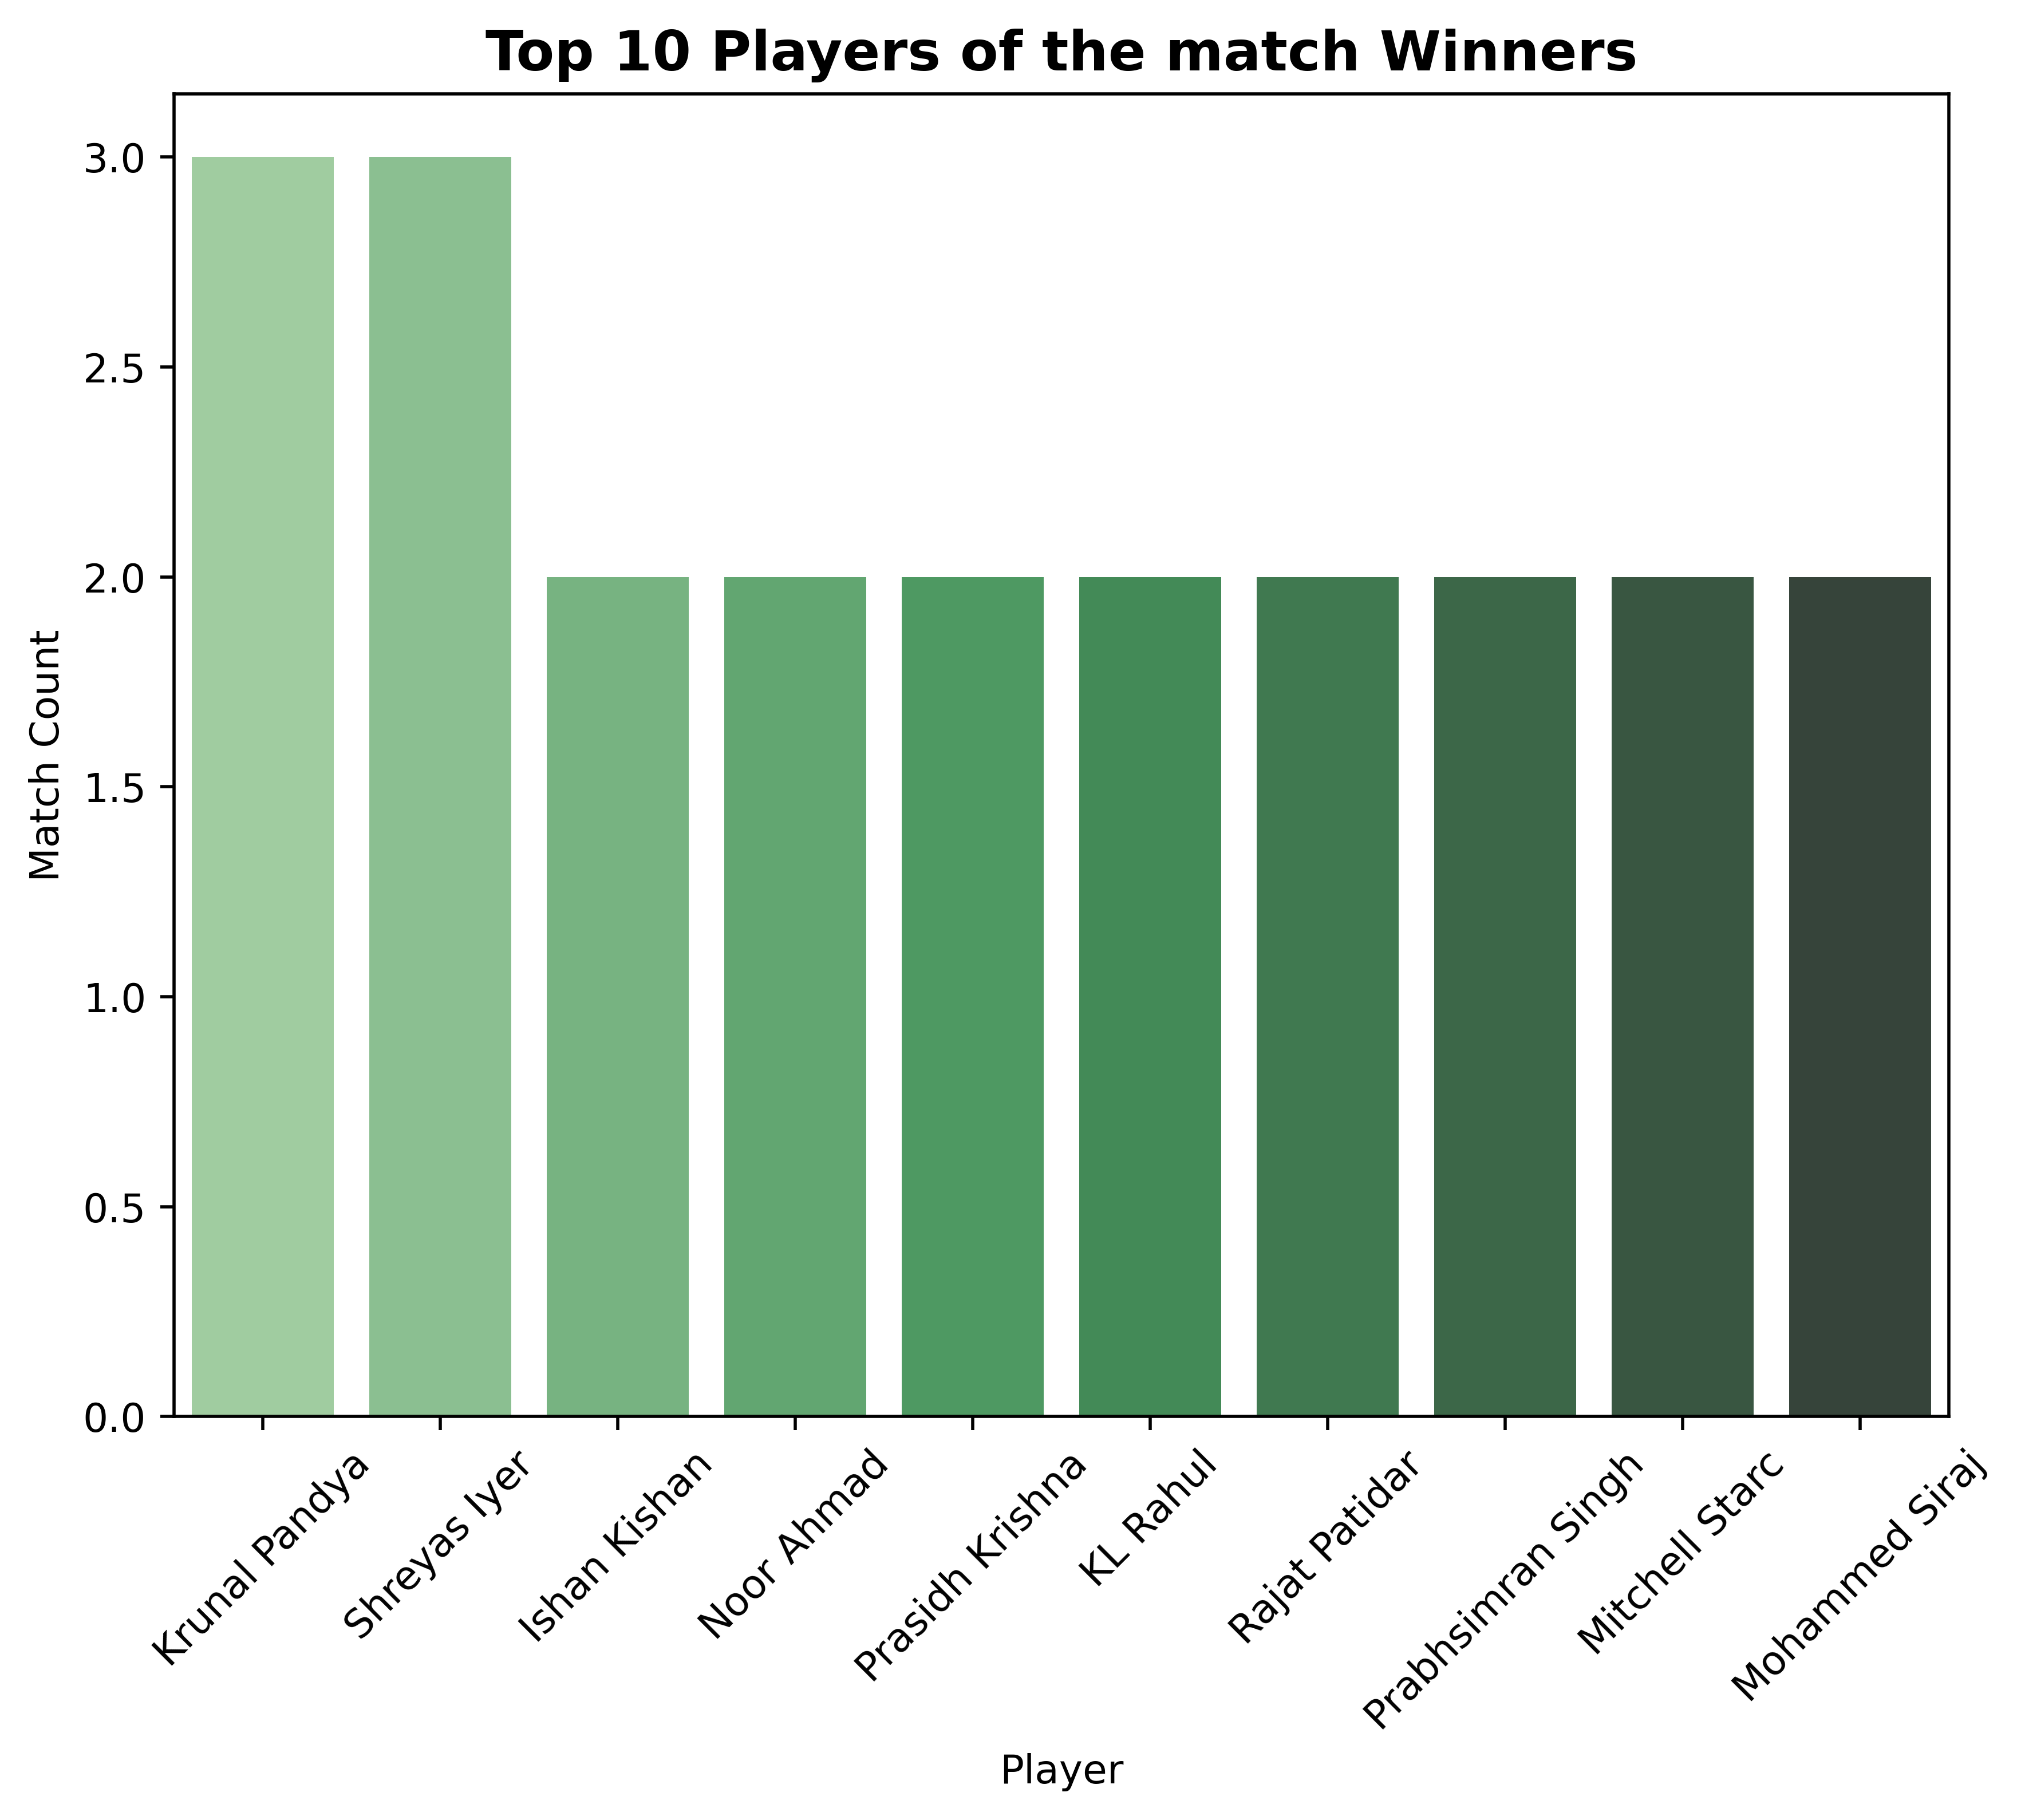

In [210]:
plt.figure(figsize=(8,6), dpi = 500)
sns.barplot(x = Pom_counts.index,y= Pom_counts.values,palette='Greens_d')
plt.xticks(rotation = 45)
plt.title("Top 10 Players of the match Winners",fontsize = 14 , fontweight = 'bold')
plt.ylabel("Match Count")
plt.xlabel("Player")
plt.show()

# 7. Is there a trend in wide ball runs over the daily View 

In [213]:
wide_runs_by_day = cricket_data.groupby(cricket_data['date'].dt.date)['wide ball runs'].sum()

In [214]:
wide_runs_by_day

date
2025-03-22    25.0
2025-03-23    69.0
2025-03-24    25.0
2025-03-25    11.0
2025-03-26    25.0
              ... 
2025-05-27    25.0
2025-05-29    25.0
2025-05-30    20.0
2025-06-01    25.0
2025-06-03     6.0
Name: wide ball runs, Length: 62, dtype: float64

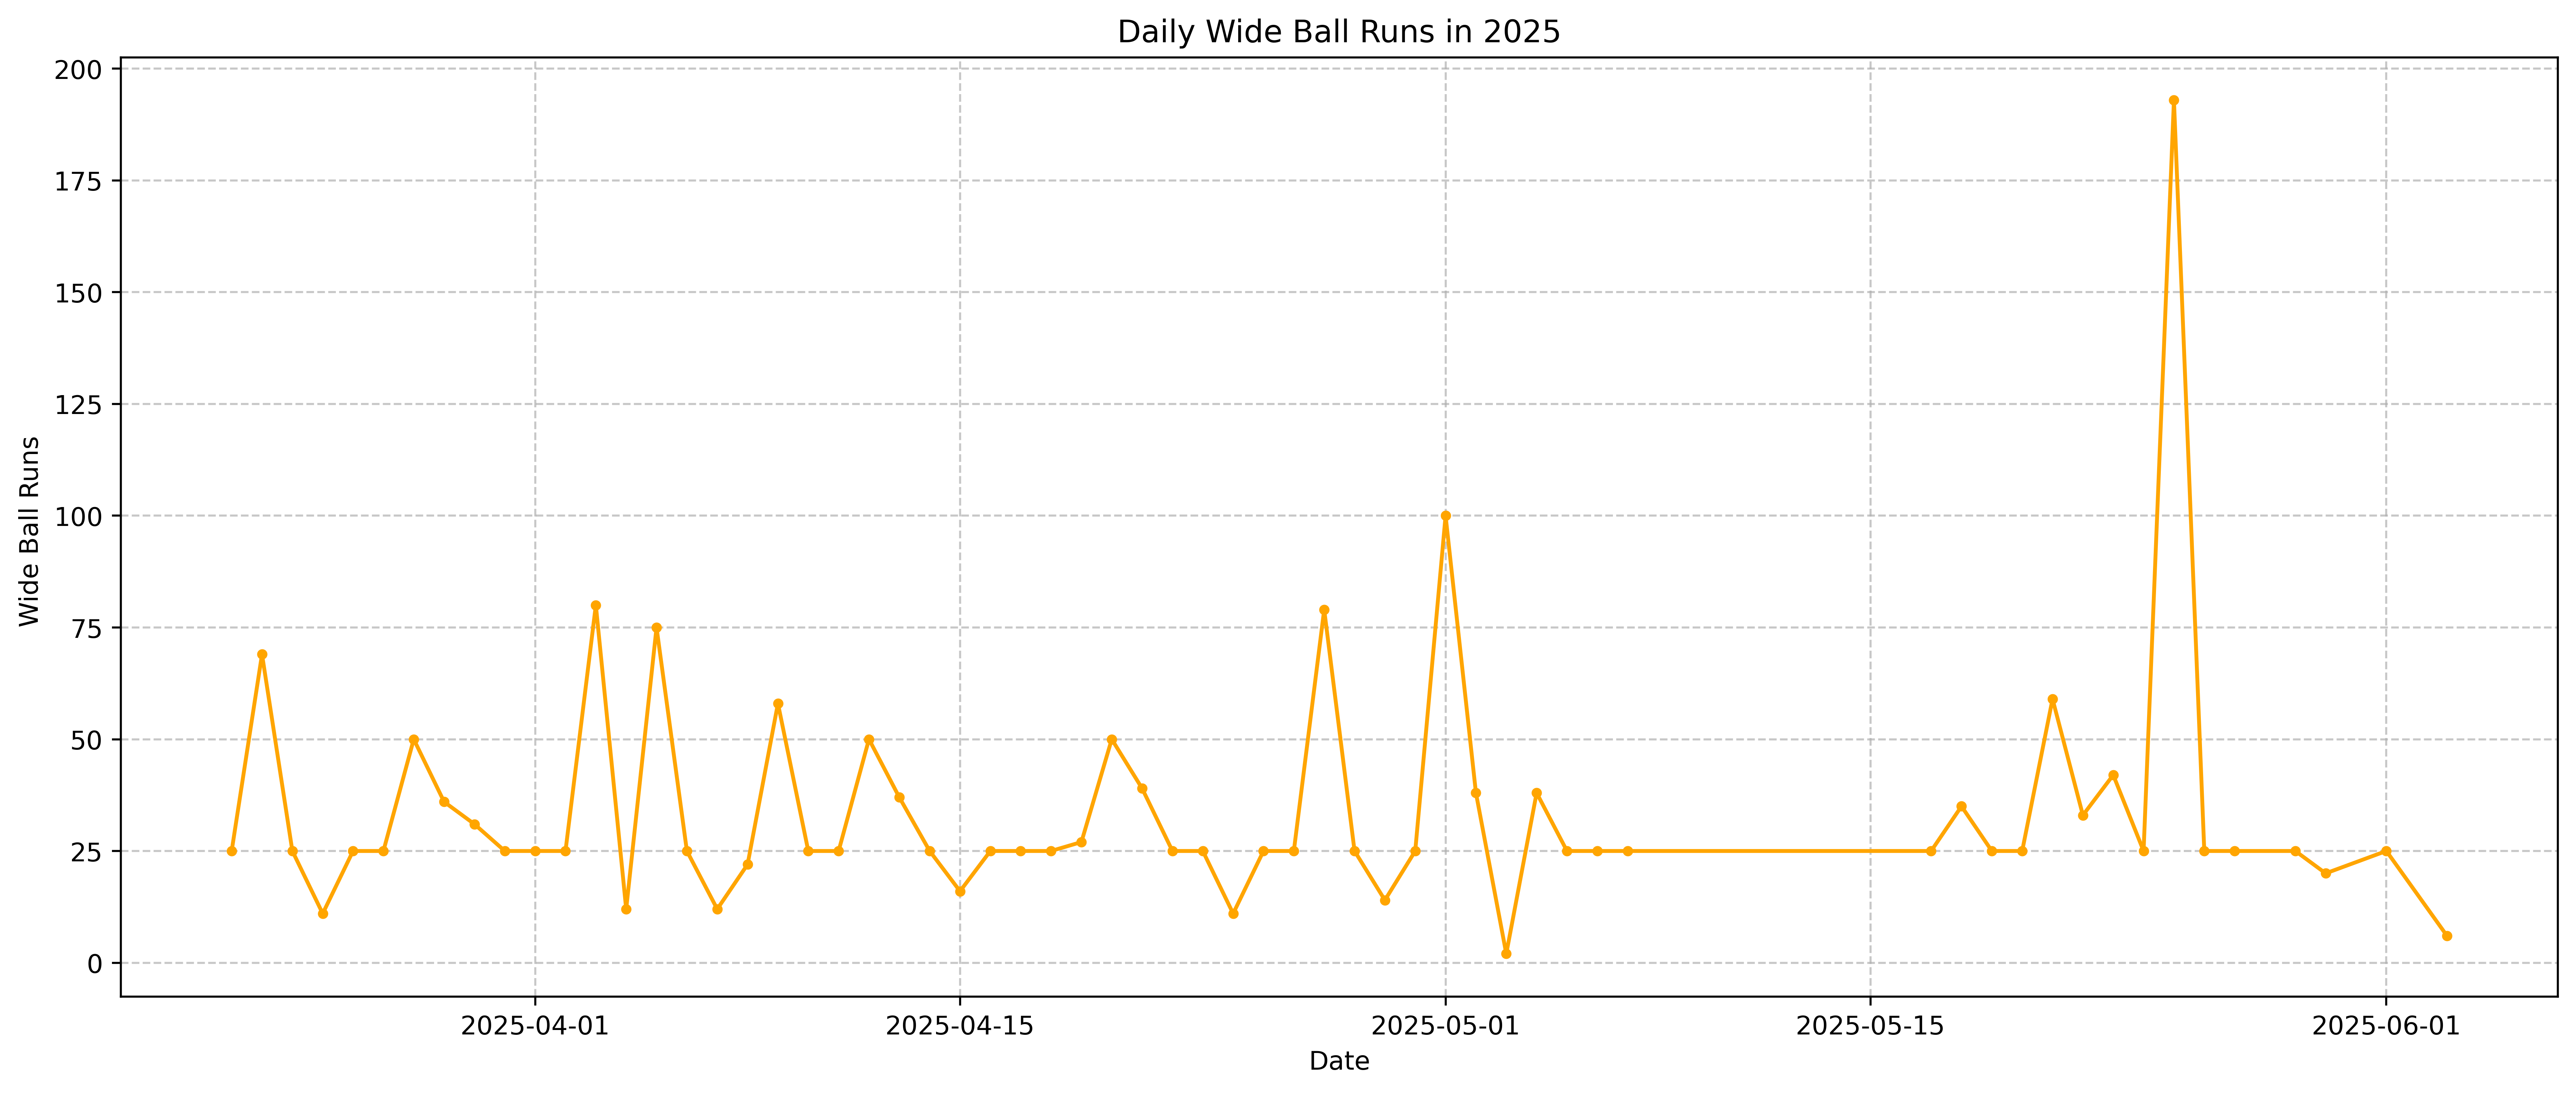

In [228]:
plt.figure(figsize=(14,6),dpi = 500)
plt.plot(wide_runs_by_day.index , wide_runs_by_day.values,marker = '.',linestyle = '-',color='Orange')
plt.title("Daily Wide Ball Runs in 2025")
plt.xlabel("Date")
plt.ylabel("Wide Ball Runs ")
plt.grid(True,linestyle = '--',alpha = 0.7)
plt.tight_layout()
plt.show()